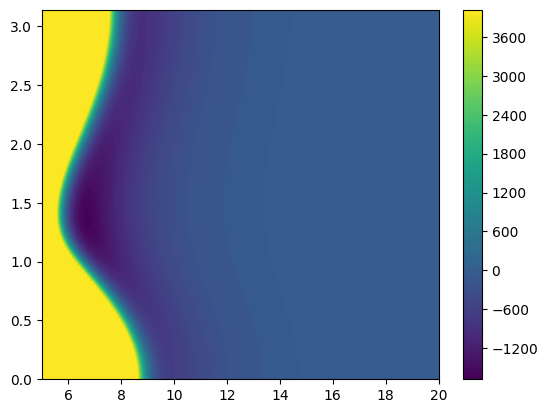

In [1]:
import sys
sys.path.append("../")

from utility.potential import *
from utility.propagation import *
from utility.units import CM_INV
from tqdm import tqdm # type: ignore
import numpy as np
import matplotlib.pyplot as plt

if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

r_points = np.linspace(5, 20, 500)
theta_points = np.linspace(0, np.pi, 100)

r_mesh, theta_mesh = np.meshgrid(r_points, theta_points)
potential = ForceField.theoretical().value(r_mesh, theta_mesh)
potential_cm = np.clip(potential / CM_INV, -np.inf, 4000)

fig, ax = plt.subplots()
CS = ax.contourf(r_points, theta_points, potential_cm, levels=100)
fig.colorbar(CS);

In [2]:
def default_propagation(save_prefix: str, j_init: int, omega_init: int, j_tot: int) -> Propagation:
    propagation = Propagation(save_prefix, j_init, omega_init, j_tot)
    propagation.provider.potential = ForceField.theoretical()

    return propagation

# Force Field calculation

In [3]:
print("j init: 0, omega init: 0, j_tot: 150")
propagation = default_propagation("force_field_0_0", 0, 0, 150)
propagation.config.animation = AnimationConfig.All
propagation.provider.transform_gamma = 0.
propagation = propagation.into_split()

propagation.propagate()
propagation.get_losses()
propagation.save_savers()

print("j init: 1, omega init: 0, j_tot: 150")
propagation = default_propagation("force_field_1_0", 1, 0, 150)
propagation.config.animation = AnimationConfig.All
propagation.provider.transform_gamma = 0.
propagation = propagation.into_split()

propagation.propagate()
propagation.get_losses()
propagation.save_savers()

print("j init: 1, omega init: 1, j_tot: 150")
propagation = default_propagation("force_field_1_1", 1, 1, 150)
propagation.config.animation = AnimationConfig.All
propagation.provider.transform_gamma = 0.
propagation = propagation.into_split()

propagation.propagate()
propagation.get_losses()
propagation.save_savers()

j init: 0, omega init: 0, j_tot: 150
j init: 1, omega init: 0, j_tot: 150
j init: 1, omega init: 1, j_tot: 150


In [13]:
js = [3, 5, 10]
for j in js:
    for omega in range(0, j+1):
        print(f"j init: {j}, omega init: {omega}, j_tot: 150")
        propagation = default_propagation(f"force_field_{j}_{omega}", j, omega, 150)
        propagation.config.animation = AnimationConfig.Polar
        propagation.provider.transform_gamma = 0.
        propagation = propagation.into_split()

        propagation.propagate()
        propagation.get_losses()
        propagation.save_savers()

j init: 3, omega init: 0, j_tot: 150
j init: 3, omega init: 1, j_tot: 150
j init: 3, omega init: 2, j_tot: 150
j init: 3, omega init: 3, j_tot: 150
j init: 5, omega init: 0, j_tot: 150
j init: 5, omega init: 1, j_tot: 150
j init: 5, omega init: 2, j_tot: 150
j init: 5, omega init: 3, j_tot: 150
j init: 5, omega init: 4, j_tot: 150
j init: 5, omega init: 5, j_tot: 150
j init: 10, omega init: 0, j_tot: 150
j init: 10, omega init: 1, j_tot: 150
j init: 10, omega init: 2, j_tot: 150
j init: 10, omega init: 3, j_tot: 150
j init: 10, omega init: 4, j_tot: 150
j init: 10, omega init: 5, j_tot: 150
j init: 10, omega init: 6, j_tot: 150
j init: 10, omega init: 7, j_tot: 150
j init: 10, omega init: 8, j_tot: 150
j init: 10, omega init: 9, j_tot: 150
j init: 10, omega init: 10, j_tot: 150


In [14]:
j_init = 0
omega_init = 0
energy_kelvin = 3700
losses = CumulativeLosses(j_init, energy_kelvin)

for j_tot in tqdm(losses.j_totals):
    propagation = default_propagation("ff", j_init, omega_init, j_tot)
    propagation.params.energy_kelvin = energy_kelvin
    propagation = propagation.into_split()
    
    propagation.propagate()
    losses.extract_loss(propagation)

losses.save_losses(f"ff_losses_{energy_kelvin}_{j_init}_{omega_init}")

100%|██████████| 50/50 [01:21<00:00,  1.62s/it]


In [15]:
j_init = 1
omega_init = 0
energy_kelvin = 3700
losses = CumulativeLosses(j_init, energy_kelvin)

for j_tot in tqdm(losses.j_totals):
    propagation = default_propagation("ff", j_init, omega_init, j_tot)
    propagation.params.energy_kelvin = energy_kelvin
    propagation = propagation.into_split()
    
    propagation.propagate()
    losses.extract_loss(propagation)

losses.save_losses(f"ff_losses_{energy_kelvin}_{j_init}_{omega_init}")

100%|██████████| 50/50 [01:21<00:00,  1.63s/it]


In [16]:
j_init = 1
omega_init = 1
energy_kelvin = 3700
losses = CumulativeLosses(j_init, energy_kelvin)

for j_tot in tqdm(losses.j_totals):
    propagation = default_propagation("ff", j_init, omega_init, j_tot)
    propagation.params.energy_kelvin = energy_kelvin
    propagation = propagation.into_split()
    
    propagation.propagate()
    losses.extract_loss(propagation)

losses.save_losses(f"ff_losses_{energy_kelvin}_{j_init}_{omega_init}")

100%|██████████| 50/50 [01:21<00:00,  1.63s/it]


# Force field manipulation

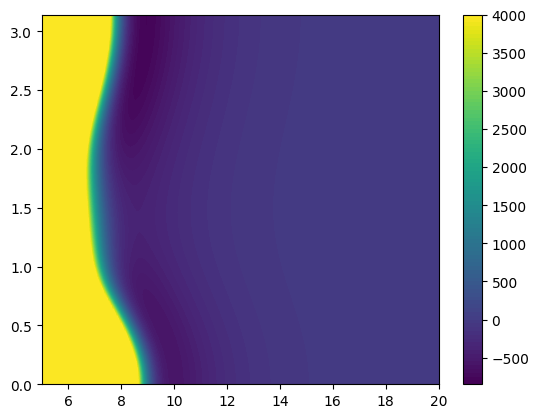

In [21]:
import matplotlib.pyplot as plt

r = np.linspace(5, 20, 300)
theta = np.linspace(0, np.pi, 100)

theta_mesh, r_mesh = np.meshgrid(theta, r, indexing="ij")
potential = ForceField.theoretical()
potential.rep_c *= 10

potential_array = potential.value(r_mesh, theta_mesh) / CM_INV
potential_array = np.clip(potential_array, -np.inf, 4000)

fig, ax = plt.subplots()
CS = ax.contourf(r, theta, potential_array, levels = 100)
fig.colorbar(CS);

# Changing potentials

In [18]:
scalings = [0.2, 0.5, 2, 5]

def propagte_scaled(j_tot: int, prefix: str, potential: Potential):
    print("j = 0")
    propagation = default_propagation(f"{prefix}_0_0", 0, 0, j_tot)
    propagation.config.animation = AnimationConfig.Polar
    propagation.provider.potential = potential
    propagation.provider.transform_gamma = 0.
    propagation = propagation.into_split()

    propagation.propagate()
    propagation.save_savers()

    print("j = 1, omega = 0")
    propagation = default_propagation(f"{prefix}_1_0", 1, 0, j_tot)
    propagation.config.animation = AnimationConfig.Polar
    propagation.provider.potential = potential
    propagation.provider.transform_gamma = 0.
    propagation = propagation.into_split()

    propagation.propagate()
    propagation.save_savers()

    print("j = 1, omega = 1")
    propagation = default_propagation(f"{prefix}_1_1", 1, 0, j_tot)
    propagation.config.animation = AnimationConfig.Polar
    propagation.provider.potential = potential
    propagation.provider.transform_gamma = 0.
    propagation = propagation.into_split()

    propagation.propagate()
    propagation.save_savers()

    for omega in range(6):
        print(f"j = 5, omega = {omega}")
        propagation = default_propagation(f"{prefix}_5_{omega}", 5, omega, j_tot)
        propagation.config.animation = AnimationConfig.Polar
        propagation.provider.potential = potential
        propagation.provider.transform_gamma = 0.
        propagation = propagation.into_split()
        
        propagation.propagate()
        propagation.save_savers()

## changing dipole

dipole scaling 0.2
dipole scaling 0.5
dipole scaling 2
dipole scaling 5


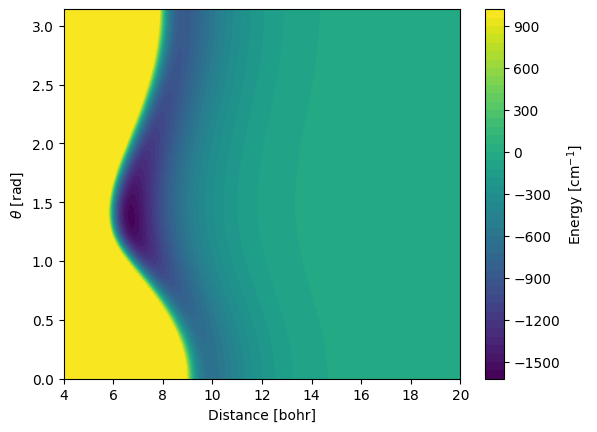

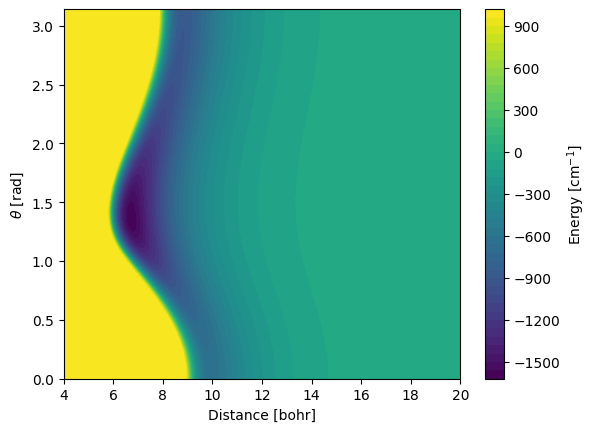

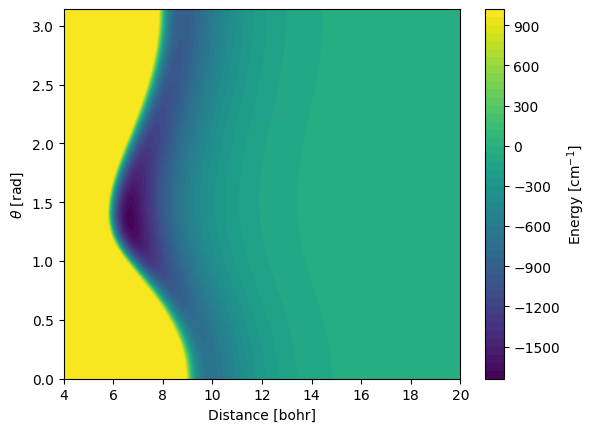

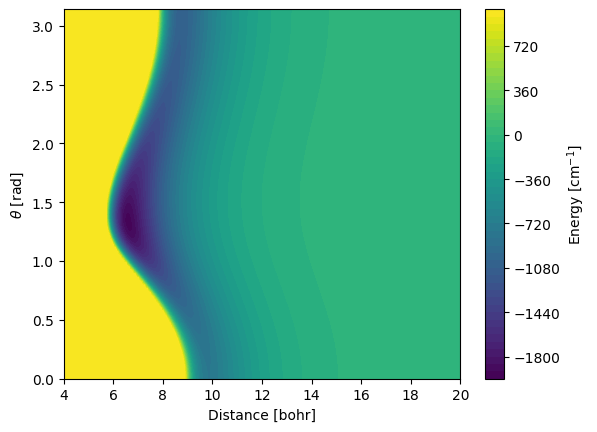

In [11]:
PLOT_SAVE = "../plots/"

for scaling in scalings:
    print("dipole scaling", scaling)
    potential = ForceField.theoretical()
    potential.alpha *= scaling
    potential.save(PLOT_SAVE, f"dipole_scaling_{scaling}")

    propagte_scaled(150, f"dipole_scaling_{scaling}", potential)


repulsive O scaling 0.2
repulsive O scaling 0.5
repulsive O scaling 2
repulsive O scaling 5
repulsive C scaling 0.2
repulsive C scaling 0.5
repulsive C scaling 2
repulsive C scaling 5
repulsive S scaling 0.2
repulsive S scaling 0.5
repulsive S scaling 2
repulsive S scaling 5


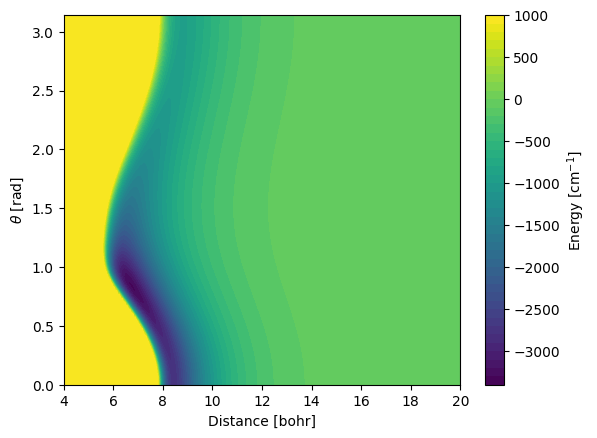

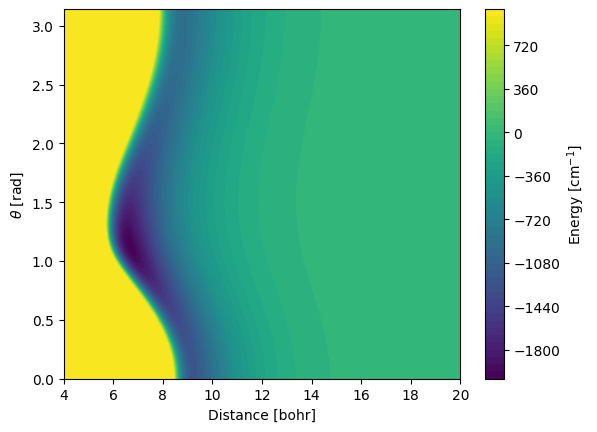

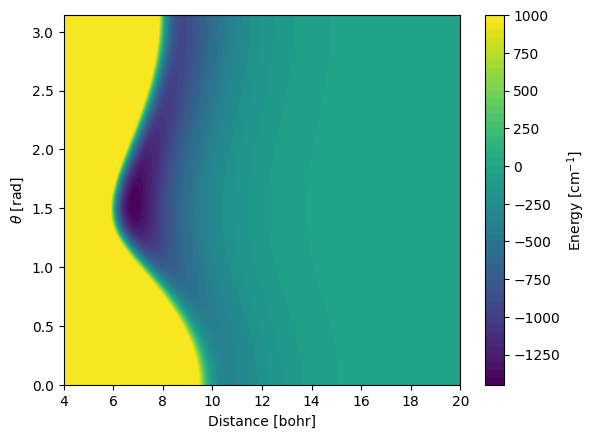

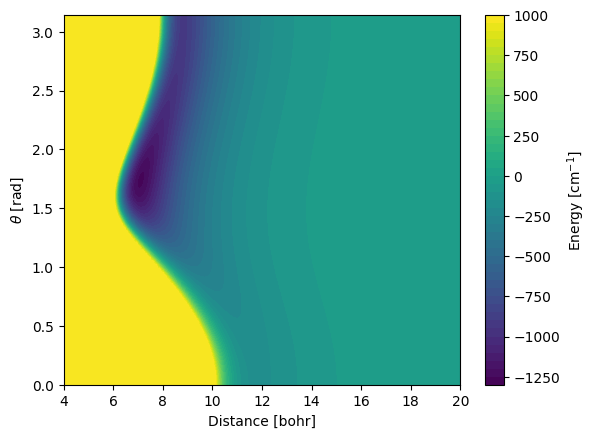

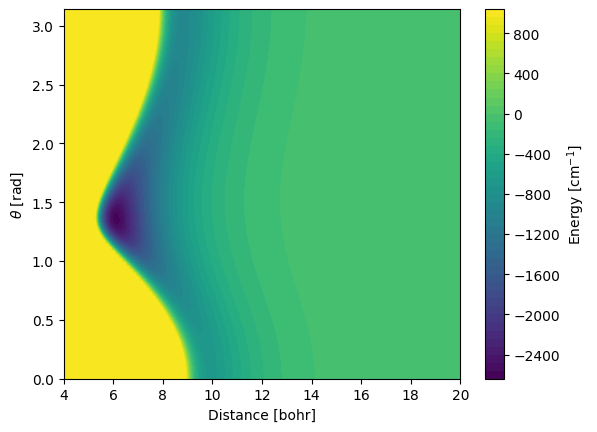

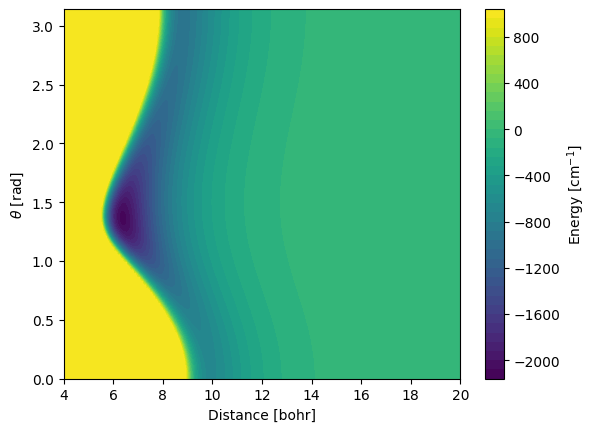

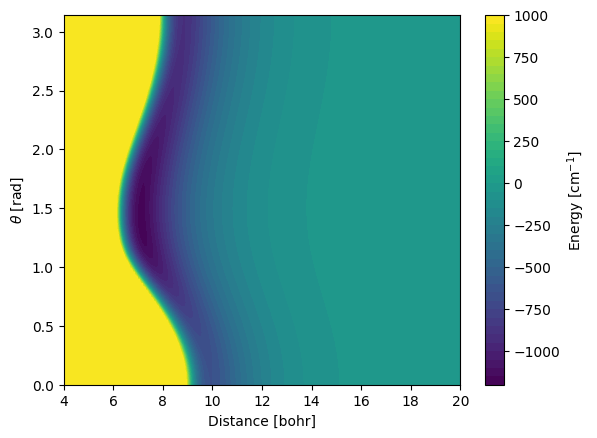

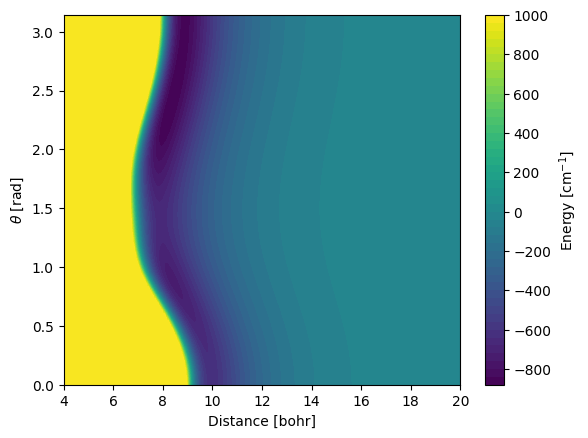

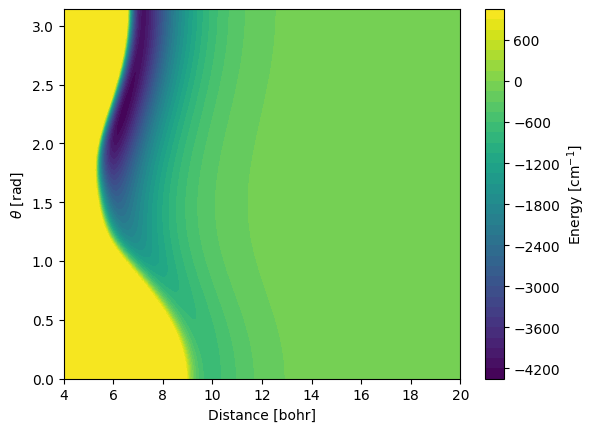

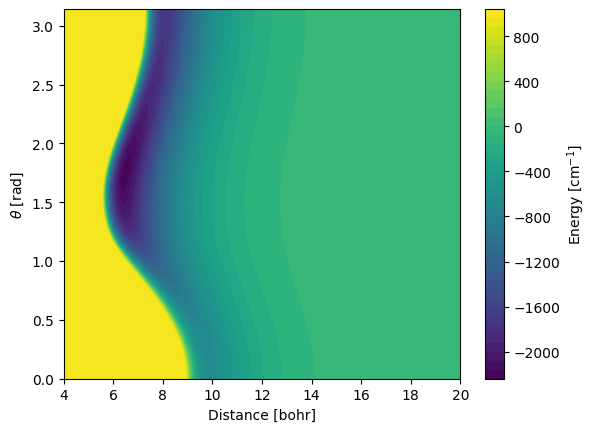

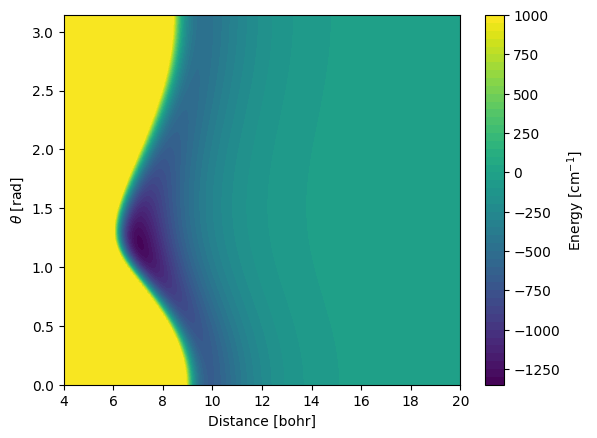

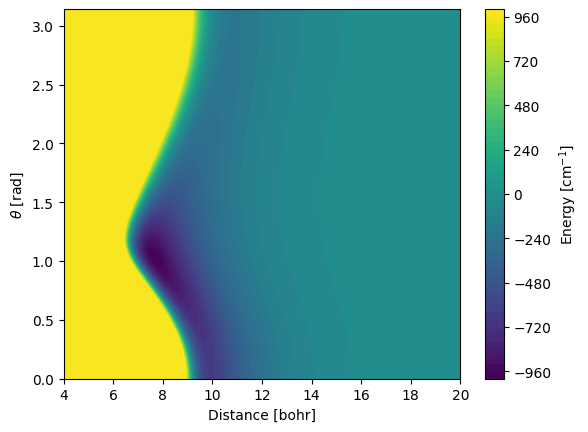

In [12]:
for scaling in scalings:
    print("repulsive O scaling", scaling)
    potential = ForceField.theoretical()
    potential.rep_o *= scaling
    potential.save(PLOT_SAVE, f"rep_o_scaling_{scaling}")

    propagte_scaled(150, f"rep_o_scaling_{scaling}", potential)

for scaling in scalings:
    print("repulsive C scaling", scaling)
    potential = ForceField.theoretical()
    potential.rep_c *= scaling
    potential.save(PLOT_SAVE, f"rep_c_scaling_{scaling}")

    propagte_scaled(150, f"rep_c_scaling_{scaling}", potential)

for scaling in scalings:
    print("repulsive S scaling", scaling)
    potential = ForceField.theoretical()
    potential.rep_s *= scaling
    potential.save(PLOT_SAVE, f"rep_s_scaling_{scaling}")

    propagte_scaled(150, f"rep_s_scaling_{scaling}", potential)


attractive O scaling 0.2
attractive O scaling 0.5
attractive O scaling 2
attractive O scaling 5
attractive C scaling 0.2
attractive C scaling 0.5
attractive C scaling 2
attractive C scaling 5
attractive S scaling 0.2
attractive S scaling 0.5
attractive S scaling 2
attractive S scaling 5


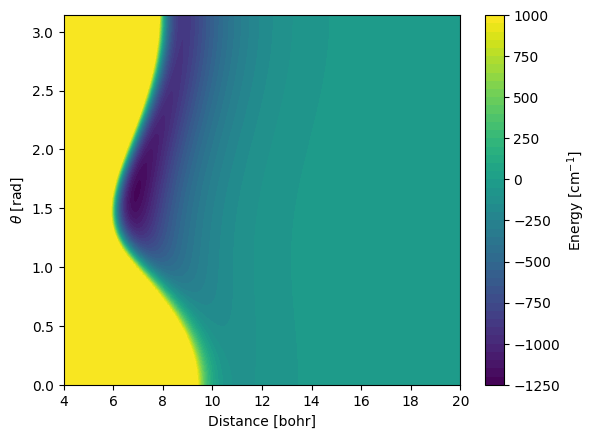

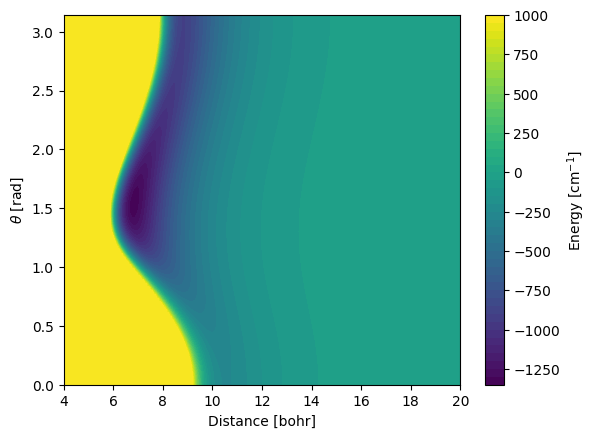

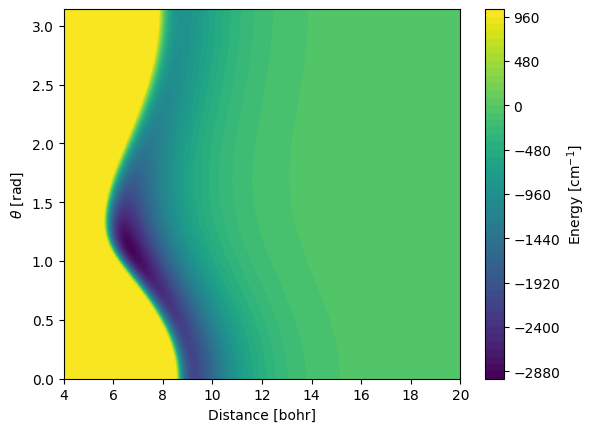

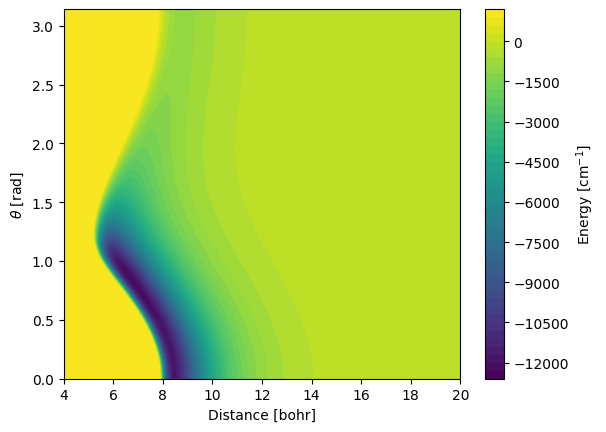

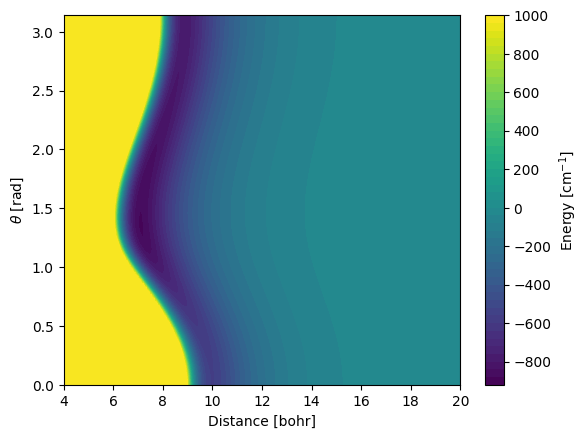

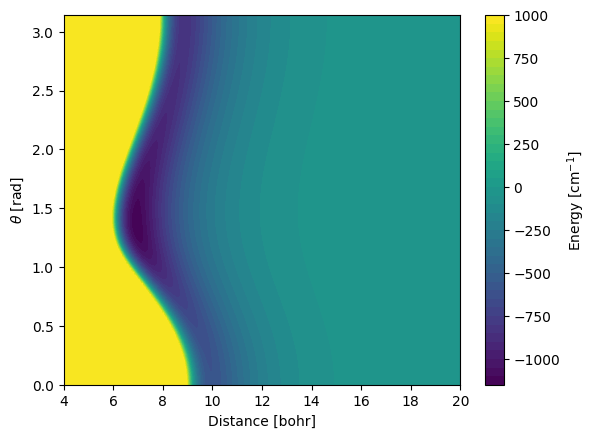

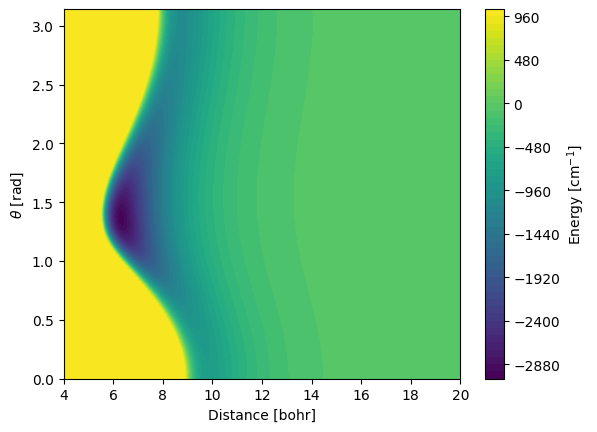

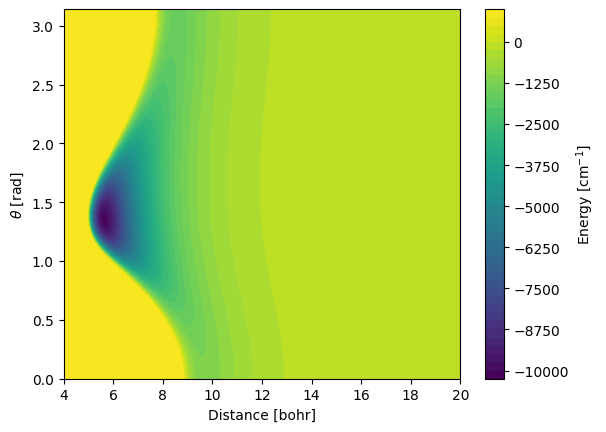

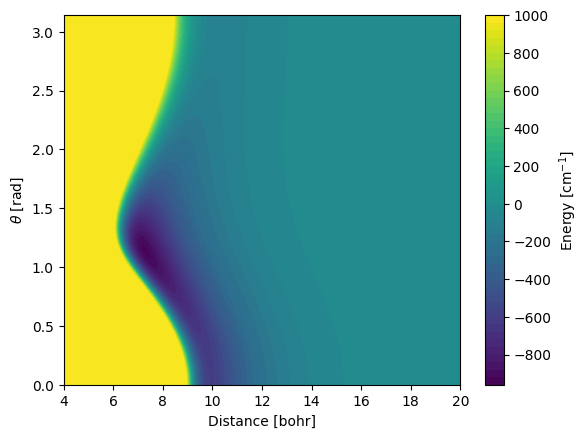

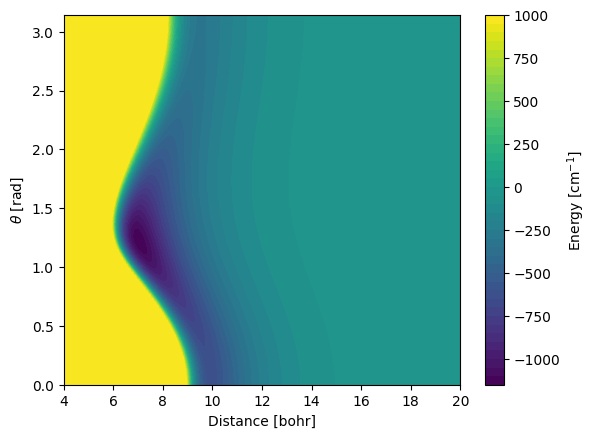

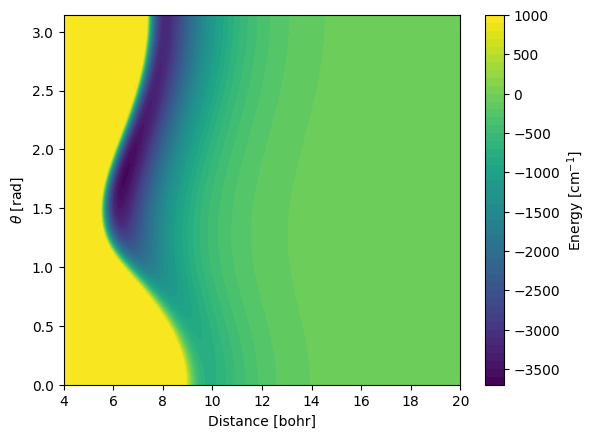

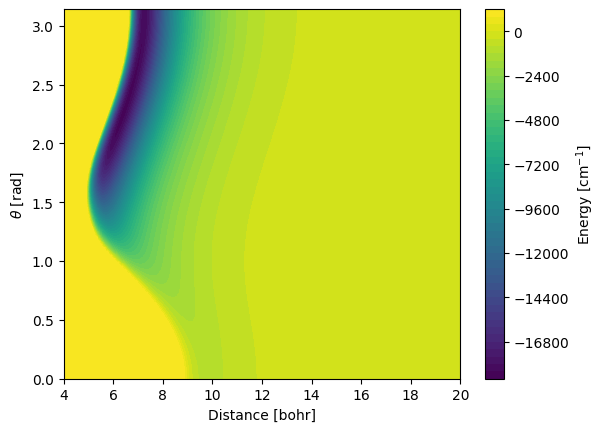

In [13]:
for scaling in scalings:
    print("attractive O scaling", scaling)
    potential = ForceField.theoretical()
    potential.attr_o *= scaling
    potential.save(PLOT_SAVE, f"attr_o_scaling_{scaling}")

    propagte_scaled(150, f"attr_o_scaling_{scaling}", potential)

for scaling in scalings:
    print("attractive C scaling", scaling)
    potential = ForceField.theoretical()
    potential.attr_c *= scaling
    potential.save(PLOT_SAVE, f"attr_c_scaling_{scaling}")

    propagte_scaled(150, f"attr_c_scaling_{scaling}", potential)

for scaling in scalings:
    print("attractive S scaling", scaling)
    potential = ForceField.theoretical()
    potential.attr_s *= scaling
    potential.save(PLOT_SAVE, f"attr_s_scaling_{scaling}")

    propagte_scaled(150, f"attr_s_scaling_{scaling}", potential)
